# SMS SPAM CLASSIFIER
 

In [419]:
import pandas as pd
import numpy as np

In [420]:
df = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\spam.csv", encoding='latin1')

In [421]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [422]:
df.shape

(5572, 5)

# Data Cleaning


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [424]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [425]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [426]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [427]:
df['target']=encoder.fit_transform(df['target'])

In [428]:
df.duplicated().sum()

403

In [429]:
df=df.drop_duplicates(keep='first')

In [430]:
df.shape

(5169, 2)

# EDA

In [431]:
df.value_counts(df['target'])

target
0    4516
1     653
Name: count, dtype: int64

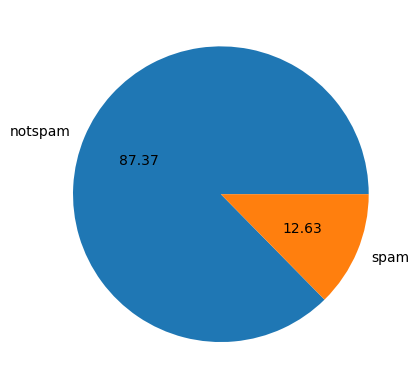

In [432]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['notspam','spam'],autopct="%0.2f")
plt.show()

In [433]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [434]:
df['no_char']=df['text'].apply(len)

In [435]:
df['no_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [436]:
df['no_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [437]:
df.head()

,target,text,no_char,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [438]:
df[['no_char','no_words','no_sentence']].describe()

,no_char,no_words,no_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [439]:
#for not spam msg
df[df['target']==0][['no_char','no_words','no_sentence']].describe()

,no_char,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [440]:
#for spam
df[df['target']==1][['no_char','no_words','no_sentence']].describe()

,no_char,no_words,no_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# Plotting graps for eda


<Axes: xlabel='no_char', ylabel='Count'>

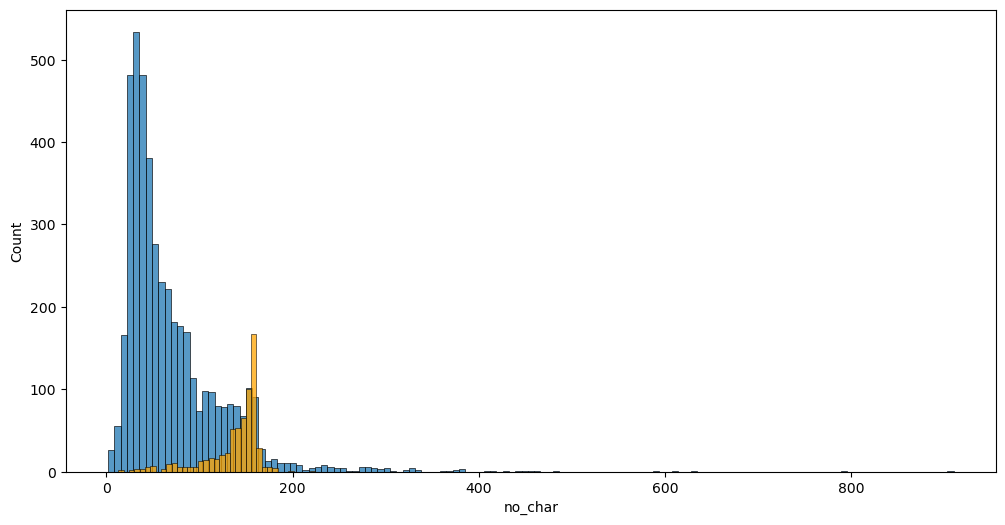

In [441]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['no_char'])
sns.histplot(df[df['target']==1]['no_char'],color='orange')

<Axes: xlabel='no_words', ylabel='Count'>

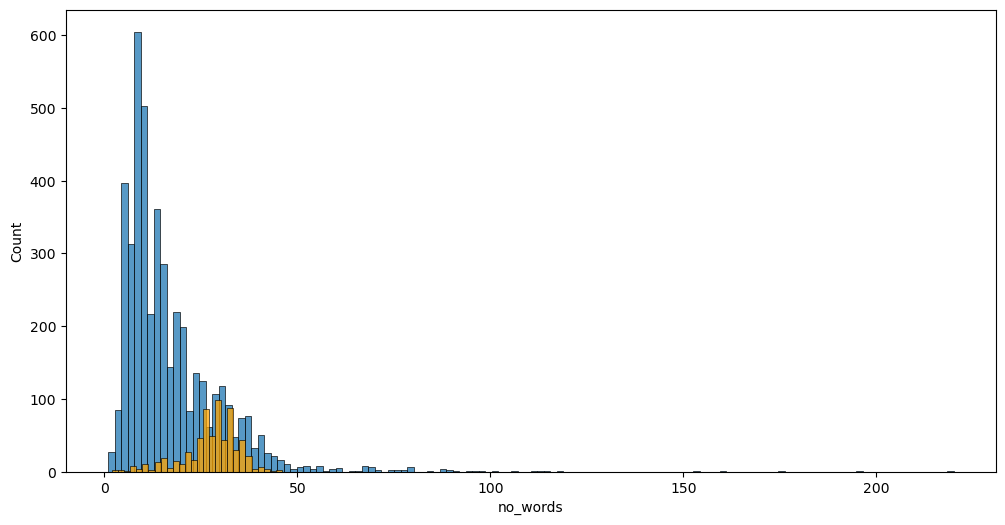

In [442]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['no_words'])
sns.histplot(df[df['target']==1]['no_words'],color='orange')

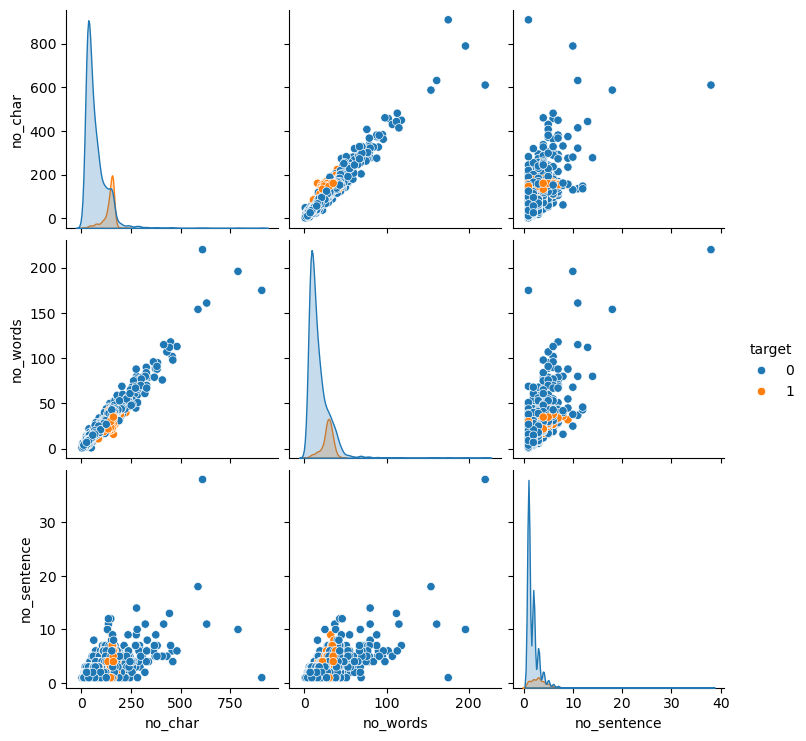

In [443]:
sns.pairplot(df,hue='target')
#this states thatr there are outliers

<Axes: >

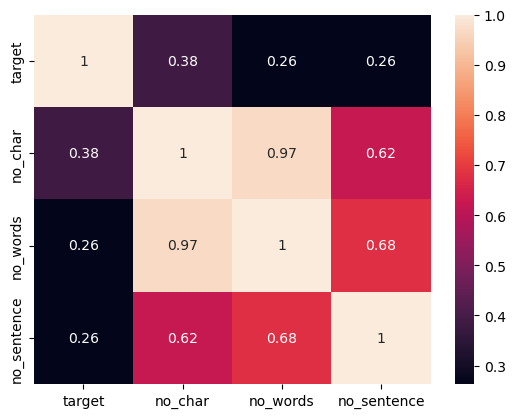

In [444]:
# Select only numeric columns for correlation
numeric_columns = ['target', 'no_char', 'no_words', 'no_sentence']
sns.heatmap(df[numeric_columns].corr(),annot=True)

# Text Preprocessing

In [445]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [446]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [447]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [448]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [449]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    l=[]
    for i in text:
        if i.isalnum():
            l.append(i)
            
    text=l[:]
    l.clear()
   
    for i in text:
       if i not in stopwords.words('english') and i not in string.punctuation:
              l.append(i)
    text=l[:]
    l.clear()
    
    for i in text:
        l.append(ps.stem(i))
        
    return " ".join(l)

In [450]:
# Apply the transformation and save it back to the DataFrame
df['transformed_text'] = df['text'].apply(transform_text)

In [451]:
df.head()

,target,text,no_char,no_words,no_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Genarating word clouds

In [452]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [453]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

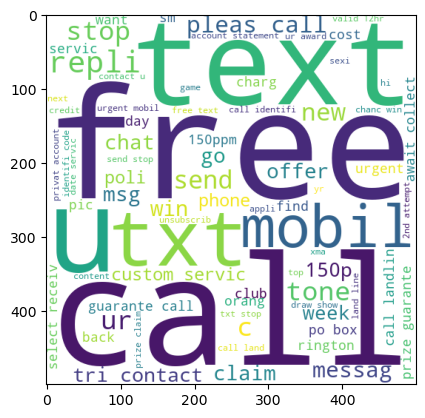

In [454]:
plt.imshow(spam_wc)

In [455]:
not_spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

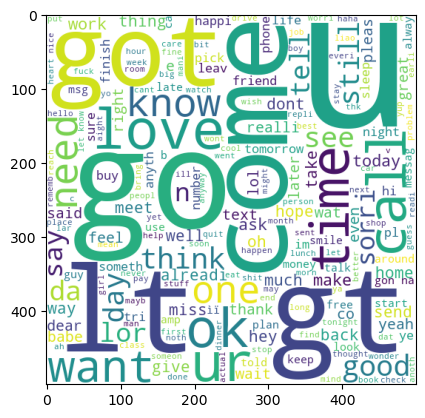

In [456]:
plt.imshow(not_spam_wc)

In [457]:
spam_list=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for i in msg.split():
        spam_list.append(i)

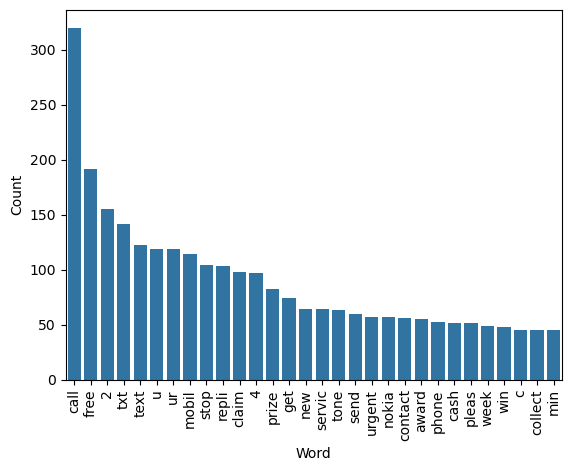

In [458]:
# Create DataFrame with proper column names
from collections import Counter
spam_freq_df = pd.DataFrame(Counter(spam_list).most_common(30), columns=['Word', 'Count'])
sns.barplot(data=spam_freq_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [459]:
not_spam_list=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for i in msg.split():
        not_spam_list.append(i)

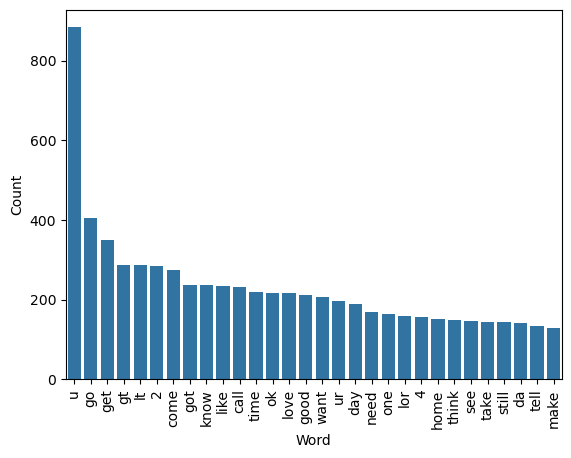

In [460]:
not_spam_freq_df = pd.DataFrame(Counter(not_spam_list).most_common(30), columns=['Word', 'Count'])
sns.barplot(data=not_spam_freq_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [461]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3250)
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [462]:
X.shape

(5169, 3250)

In [463]:
y=df['target'].values

In [464]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [465]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [466]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [467]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[768 120]
 [ 25 121]]
0.5020746887966805


In [468]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[888   0]
 [ 29 117]]
1.0


In [469]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[885   3]
 [ 20 126]]
0.9767441860465116


as precision score of mnb is perfect 1 with tfidf therefore we will go with it

In [470]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))